## 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata,org

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

### 1. 선 그래프

<AxesSubplot:>

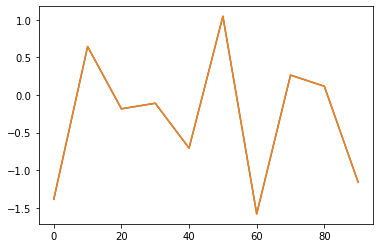

In [7]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
s

s.plot()
s.plot.line()

<AxesSubplot:>

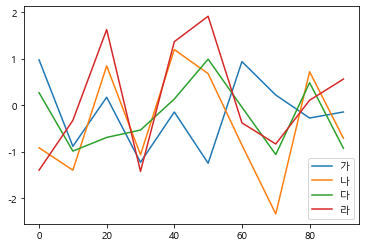

In [17]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"],
                  index=np.arange(0, 100, 10))
df1
df1.plot()

<AxesSubplot:>

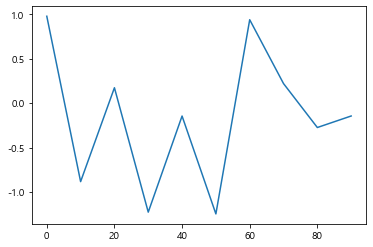

In [18]:
df1["가"].plot()

### 2. 막대 그래프

<AxesSubplot:>

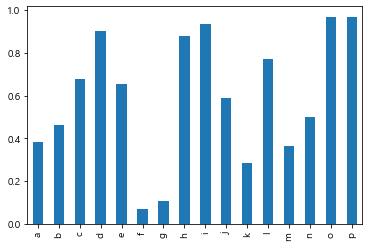

In [21]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2

s2.plot(kind="bar")
s2.plot.bar()

<AxesSubplot:>

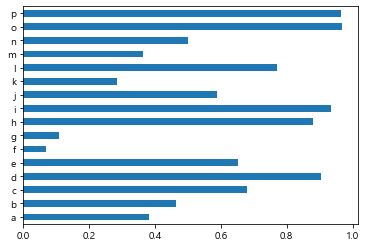

In [23]:
s2.plot(kind="barh")
s2.plot.barh()

<AxesSubplot:>

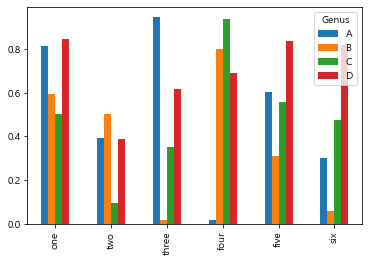

In [27]:
df2 = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2

df2.plot(kind="bar")

<AxesSubplot:>

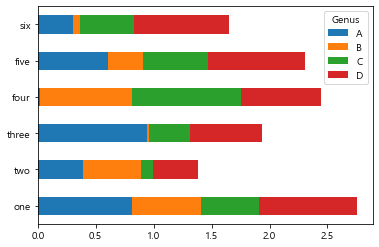

In [30]:
df2.plot(kind="barh", stacked=True)

### 3. histogram

+ X변수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스가 필요 없다.

<AxesSubplot:>

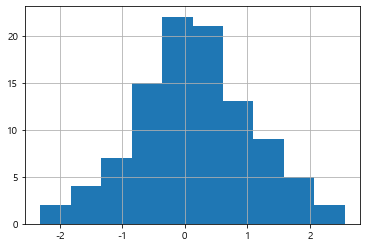

In [36]:
s = pd.Series(np.random.normal(0, 1, size=100))
s

s.hist()

<AxesSubplot:>

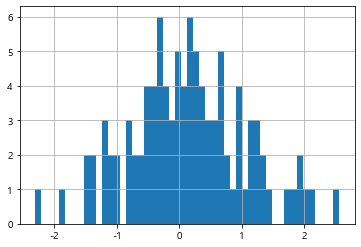

In [37]:
s.hist(bins=50)